# Confusion Matrix - Roc Curve - Classification Metrics

In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [10]:
dataset= pd.read_csv('/Users/christopherdevairakkam/Desktop/rain.csv')
dataset=pd.DataFrame(data=dataset.iloc[:,1:6].values,columns=["outlook","temprature","humdity","windy","play"])
filter = dataset["outlook"]=="Rainy"
dataset.where(filter).count()
dataset_encoded=dataset.iloc[:,0:5]
le=LabelEncoder()
for i in dataset_encoded:
    dataset_encoded[i]=le.fit_transform(dataset_encoded[i])

print(dataset_encoded)
print(dataset)

    outlook  temprature  humdity  windy  play
0         1           1        0      0     0
1         1           1        0      1     0
2         0           1        0      0     1
3         2           2        0      0     1
4         2           0        1      0     1
5         2           0        1      1     0
6         0           0        1      1     1
7         1           2        0      0     0
8         1           0        1      0     1
9         2           2        1      0     1
10        1           2        1      1     1
11        0           2        0      1     1
12        0           1        1      0     1
13        2           2        0      1     0
     outlook temprature humdity  windy play
0      Rainy        Hot    High  False   No
1      Rainy        Hot    High   True   No
2   Overcast        Hot    High  False  Yes
3      Sunny       Mild    High  False  Yes
4      Sunny       Cool  Normal  False  Yes
5      Sunny       Cool  Normal   True   No
6 

In [23]:
#Feature Set
X=dataset_encoded.iloc[:,0:4].values
#Label Set
y=dataset_encoded.iloc[:,4].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

model=DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)

predicted=model.predict(X_test)
print(predicted,y_test)


[0 1 1 1 1] [1 1 0 0 1]


## Confusion Matrix

In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predicted)

array([[0, 2],
       [1, 2]])

## Accuracy Score

In [25]:
# Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted)

0.4

## F1 Score

In [44]:
from sklearn.metrics import f1_score

f1_score(y_test,predicted,average='micro'),f1_score(y_test,predicted,average='macro'),f1_score(y_test,predicted,average='weighted')

(0.4000000000000001, 0.28571428571428575, 0.34285714285714286)

## Plotting ROC Curve

In [38]:
# Plotting Roc Curve
from sklearn.metrics import roc_auc_score,roc_curve
probs=model.predict_proba(X_test)
probs=probs[:,0]
auc=roc_auc_score(y_test,probs)
print(auc)

0.6666666666666666


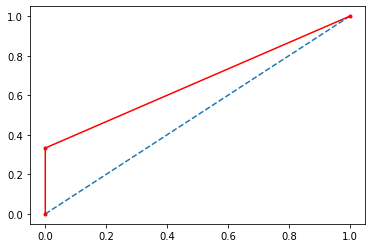

In [39]:
fpr,tpr,thres=roc_curve(y_test,probs)
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker=".",color='red')

## Precision Score

In [45]:
from sklearn.metrics import precision_score
precision_score(y_test,predicted)

0.5

## Recall Score

In [46]:
from sklearn.metrics import recall_score
recall_score(y_test,predicted)

0.6666666666666666